In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

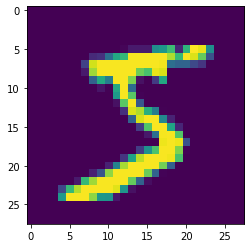

In [2]:
plt.imshow(X_train[0])

In [3]:
X_train = X_train/255
X_test = X_test/255

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [5]:
784/2

392.0

In [6]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [7]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [8]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.5),
                   metrics=['accuracy'])

In [9]:
autoencoder.fit(X_train,X_train,epochs=5, validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2526 - accuracy: 0.7913 - val_loss: 0.2091 - val_accuracy: 0.7886
Epoch 2/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1855 - accuracy: 0.7971 - val_loss: 0.1680 - val_accuracy: 0.7977
Epoch 3/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1623 - accuracy: 0.8014 - val_loss: 0.1546 - val_accuracy: 0.8042
Epoch 4/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1506 - accuracy: 0.8037 - val_loss: 0.1475 - val_accuracy: 0.8034
Epoch 5/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1433 - accuracy: 0.8050 - val_loss: 0.1394 - val_accuracy: 0.8061


Original Image


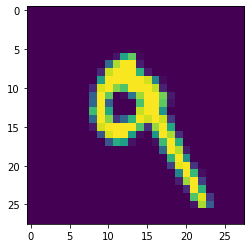

Attempted Reeconstruction (after autoencoder)


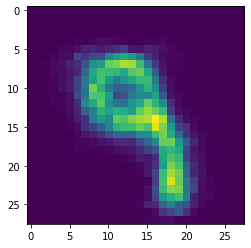

In [11]:
passed_images = autoencoder.predict(X_test[:10])

n = 7
print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Attempted Reeconstruction (after autoencoder)")
plt.imshow(passed_images[n])

In [12]:
# Squeezes features from 784 to 25 main features and back out

In [13]:
# Autoencoder noise removal

In [14]:
from tensorflow.keras.layers import GaussianNoise

In [15]:
sample = GaussianNoise(0.2)

In [17]:
noisey = sample(X_test[:10], training=True)

ORIGINAL


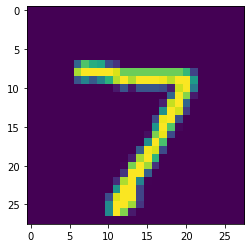

noisy


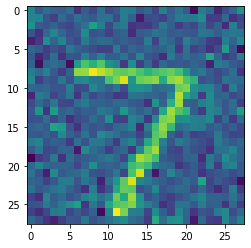

In [19]:
n = 0
print("ORIGINAL")
plt.imshow(X_test[n])
plt.show()
print("noisy")
plt.imshow(noisey[n])
plt.show()

In [20]:
import tensorflow as tf

In [21]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [22]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [23]:
noise_remover = Sequential([encoder,decoder])
noise_remover.compile(loss='binary_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])
noise_remover.fit(X_train, X_train, epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1676 - accuracy: 0.8014
Epoch 2/8
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1302 - accuracy: 0.8078
Epoch 3/8
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1215 - accuracy: 0.8094
Epoch 4/8
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1156 - accuracy: 0.8104
Epoch 5/8
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1122 - accuracy: 0.8110
Epoch 6/8
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1094 - accuracy: 0.8115
Epoch 7/8
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1075 - accuracy: 0.8117
Epoch 8/8
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1061 - accuracy: 0.8119


In [24]:
ten_noisey = sample(X_test[:10], training=True)
denoised = noise_remover(ten_noisey)

Original


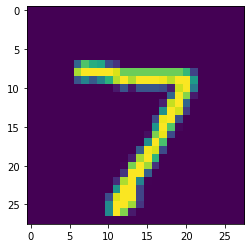

noise added


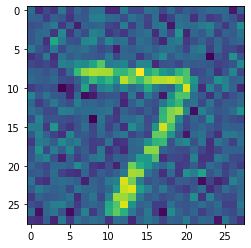

Noise removed


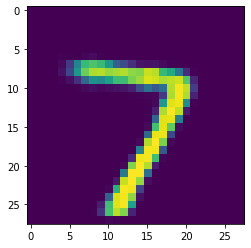

In [26]:
print("Original")
plt.imshow(X_test[0])
plt.show(
)
print("noise added")
plt.imshow(ten_noisey[0])
plt.show()
print("Noise removed")
plt.imshow(denoised[0])
plt.show()